In [1]:
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

from astropy.io import fits

from scipy import stats
from scipy.stats import norm
from scipy.stats import linregress

import glob
import os

In [2]:
### PATHS TO SCIENTIFIC DATA ON LOCAL MACHINE ###


bias = r'/Users/adamfletcher/Desktop/NGC1015_Data/NGC1015_biasframe_*'
darks60 = r'/Users/adamfletcher/Desktop/NGC1015_Data/Lab3/Darks/NGC1015_darks_60s.*.FIT'

Ha_flat = r'/Users/adamfletcher/Desktop/NGC1015_Data/Lab3/Flats/Ha/NGC1015_FlatField_Ha_2.5s.*.FIT'
blue_flat = r'/Users/adamfletcher/Desktop/NGC1015_Data/Lab3/Flats/Blue/NGC1015_FlatField_blue_4.25s.*.FIT'
red_flat = r'/Users/adamfletcher/Desktop/NGC1015_Data/Lab3/Flats/Red/NGC1015_FlatField_red_0.2s.*.FIT'
visible_flat = r'/Users/adamfletcher/Desktop/NGC1015_Data/Lab3/Flats/Visible/NGC1015_FlatField_visible_1s.*.FIT'
Ir_flat = r'/Users/adamfletcher/Desktop/NGC1015_Data/Lab3/Flats/Ir/NGC1015_FlatField_Ir_0.2s.*.FIT'

Ha_flat_darks = r'/Users/adamfletcher/Desktop/NGC1015_Data/Lab3/Flats/Ha/NGC1015_FlatField_Ha_darks_*'
blue_flat_darks = r'/Users/adamfletcher/Desktop/NGC1015_Data/Lab3/Flats/Blue/NGC1015_FlatField_blue_darks_*'
red_flat_darks = r'/Users/adamfletcher/Desktop/NGC1015_Data/Lab3/Flats/Red/NGC1015_FlatField_red_darks_*'
visible_flat_darks = r'/Users/adamfletcher/Desktop/NGC1015_Data/Lab3/Flats/Visible/NGC1015_FlatField_visible_darks_*'
Ir_flat_darks = r'/Users/adamfletcher/Desktop/NGC1015_Data/Lab3/Flats/Ir/NGC1015_FlatField_Ir_darks_*'

NGC_Ha_data = r'/Users/adamfletcher/Desktop/NGC1015_Data/Lab3/NGC1015_data/NGC1015_data_Ha_*'
NGC_blue_data = r'/Users/adamfletcher/Desktop/NGC1015_Data/Lab3/NGC1015_data/NGC1015_data_blue_*'
NGC_red_data = r'/Users/adamfletcher/Desktop/NGC1015_Data/Lab3/NGC1015_data/NGC1015_data_red_*'
NGC_visible_data = r'/Users/adamfletcher/Desktop/NGC1015_Data/Lab3/NGC1015_data/NGC1015_data_visible_*'
NGC_Ir_data = r'/Users/adamfletcher/Desktop/NGC1015_Data/Lab3/NGC1015_data/NGC1015_data_Ir_*'


In [3]:
### Write Master FITS file to Folder ###
# image_array: Image in array form to be saved as .FIT file
# file_name_string: desired name of file

def save(image_array, file_name_string):

    hdu = fits.PrimaryHDU(image_array)
    hdulist = fits.HDUList([hdu])
    hdulist.writeto(f'/Users/adamfletcher/Desktop/NGC1015_data/Lab3/NGC1015_data_reduced/{file_name_string}')
    hdulist.close()

In [4]:
### Function creates a 3D numpy array of a stack of images 
### and makes 1 image by taking the mean of the points 
### through 1 axis returning a 2D array ###

def med_image(a):
    files = []

    for name in glob.glob(a):
        hdulist = fits.open(name)
        data = hdulist[0].data
        files.append(data)
        
        mean = np.mean(data)
        std = np.std(data)
            
    #print(f'mean:{mean}')
    #print(f'std:{std}')
        
    files_array = np.array(files)

    master = np.median(files_array, axis=0)
    

    #plt.imshow(master, vmin=mean - 1*std, vmax=mean + 1*std)
    #plt.title(f"Color Image of Median Values")
    #plt.colorbar()
    #plt.show()
    
    return master

### Run median function for flat field images, subtract darks, 
### normalize the data to 1 
# b: path name
# c: master dark with matching exp time


def flat_field(b, c):
    
    ### Stacked Blue Flat Field ###

    stack = med_image(b)
    #print(stack)
    ### Subtract Stacked Median by Master Dark 30 sec ###

    MB = stack - c 
    #plt.imshow(stack)
    #plt.title(f'Flats minus Darks')
    #plt.colorbar()
    #plt.show()


    ######## Normalize the Data ########

    countvalue = MB.flatten()
    mean_stack = np.nanmean(countvalue)
    norm_stack = (MB / mean_stack)

    #plt.imshow(norm_stack)
    #plt.colorbar()
    #plt.title(f'Normalized Master Flat Field')
    #plt.show()

    
    return norm_stack 

def reduction(file_path, med_darks, norm_flat_field):
    
    data_files = []

    for name in glob.glob(file_path):
        hdulist = fits.open(name)
        imagedata = hdulist[0].data
        

        reduced = (imagedata - med_darks) / norm_flat_field
        
        data_files.append(reduced)
        
        #save(name, name)
        #mean = np.mean(data)
        #std = np.std(data)
    
            
    #print(f'mean:{mean}')
    #print(f'std:{std}')
        
    data_files_array = np.array(data_files)
    

    #two_dim = np.transpose(data_files_array)
    

    #plt.imshow(data_files_array[0], vmin = 1000, vmax = 1500)
    #plt.title(f"Color Image of Median Values")
    #plt.colorbar()
    #plt.show()
    
    return data_files_array



In [5]:
### Master Darks 60 sec ###
dark_60sec = med_image(darks60)

#save(darks30, 'MasterDarks_30s')

Ha_darks_med = med_image(Ha_flat_darks)
blue_darks_med = med_image(blue_flat_darks)
red_darks_med = med_image(red_flat_darks)
visible_darks_med = med_image(visible_flat_darks)
Ir_darks_med = med_image(Ir_flat_darks)

In [6]:
### MASTER FLAT FIELDS ###

master_Ha_flat = flat_field(Ha_flat, Ha_darks_med)
master_blue_flat = flat_field(blue_flat, blue_darks_med)
master_red_flat = flat_field(red_flat, red_darks_med)
master_visible_flat = flat_field(visible_flat, visible_darks_med)
master_Ir_flat = flat_field(Ir_flat, Ir_darks_med)

In [7]:
#### Reduces the noise for each science image in respective filters ####

Ha_reduced_data = reduction(NGC_Ha_data, dark_60sec, master_Ha_flat)
blue_reduced_data = reduction(NGC_blue_data, dark_60sec, master_blue_flat)
visible_reduced_data = reduction(NGC_visible_data, dark_60sec, master_visible_flat)
red_reduced_data = reduction(NGC_red_data, dark_60sec, master_red_flat)
Ir_reduced_data = reduction(NGC_Ir_data, dark_60sec, master_Ir_flat)

In [8]:
# Function writes new image files to working directory
# reduced_data_file: the reduced image to be saved as a .FIT
# filter_string: write the name of the filter as a string
#                for labelling purposes
# num: loops through all 20-25 images
# count: used for numbering .FIT files of same filter 
def write_reduced(reduced_data_file, filter_string):
    count = 0

    for num in reduced_data_file:
        count+=1
        save(num, f'{filter_string}_reduced_data_{count}.FIT')

In [9]:
#### Save Reduced image files ####

#write_reduced(Ha_reduced_data, 'Ha')
#write_reduced(blue_reduced_data, 'blue')
#write_reduced(visible_reduced_data, 'visible')
#write_reduced(red_reduced_data, 'red')
#write_reduced(Ir_reduced_data, 'Ir')

In [10]:
### File paths for new reduced data

NGC_Ha_data_reduced = r'/Users/adamfletcher/Desktop/NGC1015_Data/Lab3/NGC1015_data_reduced/Ha_*'
NGC_blue_data_reduced = r'/Users/adamfletcher/Desktop/NGC1015_Data/Lab3/NGC1015_data_reduced/blue_*'
NGC_red_data_reduced = r'/Users/adamfletcher/Desktop/NGC1015_Data/Lab3/NGC1015_data_reduced/red_*'
NGC_visible_data_reduced = r'/Users/adamfletcher/Desktop/NGC1015_Data/Lab3/NGC1015_data_reduced/visible_*'
NGC_Ir_data_reduced = r'/Users/adamfletcher/Desktop/NGC1015_Data/Lab3/NGC1015_data_reduced/Ir_*'

In [11]:
def background_noise(reduced_data, filter_flux_arr, box_lo, box_hi, box_left, box_right):
    
    count = 0
    error_array = []
    for back in glob.glob(reduced_data):
    
        background_file = []

        hdulist = fits.open(back)
        data = hdulist[0].data
        background_file.append(data)
        
        mean = np.mean(data)
        std = np.std(data)
        
        
        fil_array = np.array(background_file)
        fil_array = np.median(fil_array, axis = 0)

        background_box = fil_array[box_lo:box_hi, box_left:box_right]
        
        # Uncomment to verify no sources inside the background box
        #plt.imshow(background_box)#, vmin = 900, vmax = mean)
        #plt.colorbar()
        #plt.show()

        # Make 1D array and find max/min
        countvalues = background_box.flatten()

        #print(f'max count value: {np.max(countvalues)}')
        #print(f'min count value: {np.min(countvalues)}')

        # Plot the histogram to visually identify the mean
        #plt.hist(countvalues,bins=100);
        #plt.title('Histogram of Count Dispersion in Background Area')
        #plt.xlabel('Flux Counts')
        #plt.ylabel('Number of Pixels at Given Flux')
        #plt.yscale('log')

        # Compute the mean, the median, the mode, and std:
        #print(f'Image #: {count + 1}')
        #print(f'mean: {np.mean(countvalues)}')
        #print(f'mode: {stats.mode(countvalues)[0][0]}')
        #print(f'median: {np.median(countvalues)}')
        #print(f'std: {np.std(countvalues)}')
        #print(f'number of pixels: {len(countvalues)}')
    
        # Calculate the background flux and the uncertainty
        # it causes in the source flux measurement 
        background_flux_area = np.mean(countvalues) * len(countvalues)
        uncertainty = np.sqrt(background_flux_area + filter_flux_arr[count]) 
        #print(f'Uncertainty: {uncertainty}')
        #print(f'Blue Flux: {filter_flux_arr[count]}')
        error_array.append(uncertainty)
        count += 1

    error_array = np.array(error_array)
    
    load_error = np.median(error_array)
    
    return load_error

In [12]:
# Opens .txt file and converts strings into floating point
# numbers an arranges into a 4 column table of flux, flux err,
# RA, and DEC.

def float_table(file_path, ra_low, ra_high, dec_low, dec_high):
    
    # Open the file 
    f = open(file_path, 'r')
    
    # To avoid overwriting the data file, copy it as a new 
    # file called 'new.txt' and write the data in
    g = open('new.txt', 'w')
    for x in f:
        g.write(x)
    
    # Close the file to avoid corruption
    f.close()
    
    ### Optional code to view the data table ###
    # g = open('new.txt', 'r')
    # print(g.read())
    
    # Open the new data file again and save each line in 
    # a numpy array 'lines' and define 5 new empty arrays
    # that will store the data columns of the data file
    g = open('new.txt',"r")
    lines = g.readlines()

    number = []
    Flux = []
    Flux_err = []
    RA = []
    DEC = []
    
    # Loop through each line in the data file and append the 
    # respective data elements to corresponding arrays
    for x in lines:
        number.append(x.split()[0])
        Flux.append(x.split()[1])
        Flux_err.append(x.split()[2])
        RA.append(x.split()[3])
        DEC.append(x.split()[4])
    g.close()
    
    # Remove the unnecessary lines (titles, labels etc.)
    number = number[5:]
    Flux = Flux[5:]
    Flux_err = Flux_err[5:]
    RA = RA[5:]
    DEC = DEC[5:]
    
    # Define new arrays to store float conversions
    coord_ra = []
    coord_dec = []
    table_flux = []
    table_flux_err = []
    
    # Loop through data arrays and convert string numbers
    # into floats and store in new arrays above
    for i in RA:
        ra = float(i)
        coord_ra.append(ra)

    for j in DEC:
        dec = float(j)
        coord_dec.append(dec)

    for k in Flux:
        flux = float(k)
        table_flux.append(flux)
    
    for l in Flux_err:
        flux_err = float(l)
        table_flux_err.append(flux_err)

    # Recombine all the data into a table 
    float_data_table = np.dstack((table_flux,table_flux_err,coord_ra,coord_dec))
    float_data_table = float_data_table[0]
    float_data_table
    
    # Define a new set of arrays to house the data 
    # specifically for the target source
    galaxy_ra = []
    galaxy_dec = []
    galaxy_flux = []
    galaxy_flux_err = []

    # Loop through the float arrays to extract flux data relevant 
    # to the true coordinate position of our target 
    for i,j in zip(coord_ra, coord_dec):
        # lower & upper parameter guess at target coordinates
        if ra_low < i < ra_high and dec_low > j > dec_high:     
            galaxy_ra.append(i)   
            galaxy_dec.append(j) 
            if len(galaxy_ra) > 1:
                #print(f'Multiple values found for RA: {galaxy_ra}')
                galaxy_ra.pop(1)
            if len(galaxy_dec) > 1:
                #print(f'Multiple values found for DEC: {galaxy_dec}')
                galaxy_dec.pop(1)
            
    #if len(galaxy_ra) > 1:
        #print(f'Multiple values found for RA: {galaxy_ra}')
        #galaxy_ra.pop(i)
    
    #for j in coord_dec:
     #   if dec_low > j > dec_high:
      #      galaxy_dec.append(j)    
            
    #if len(galaxy_dec) > 1:
     #   print(f'Multiple values found for DEC: {galaxy_dec}')
    
    # Extract the flux and flux error from the true coordinates
    # of our target
    for k in float_data_table:
        if k[2] == galaxy_ra and k[3] == galaxy_dec:
            galaxy_flux.append(k[0])
            galaxy_flux_err.append(k[1])
        
    #print(f'RA: {galaxy_ra}')  
    #print(f'DEC: {galaxy_dec}') 
    #print(f'Flux Aperture: {galaxy_flux}')  
    #print(f'Flux Err Aperture: {galaxy_flux_err}')  

    # Function should return one value for each array, 
    # otherwise adjust ra and dec ranges
    
    return galaxy_flux, galaxy_flux_err

In [13]:
### Extract the mean value of all the fluxes and
### plot a flux curve to verify mean position

# num_file: enter the number of files for a filter
# filt: 'string', enter filter name as written in the path 
def mean_flux_extraction(num_file, filt, ra_low, ra_high, dec_low, dec_high):
    
    # Set number of data points and index the files
    # Define arrays to store extracted data
    arr = np.arange(1,num_file+1,1)
    order = 1
    filter_flux = []
    filter_flux_err = []
    
    # Loop through the files and extract the flux values
    for i in arr:
        path = f'/Users/adamfletcher/Desktop/NGC1015_Data/Lab3/SEx/{filt}_reduced_data_{order}.new.cat'
        #print(path)
        flux, flux_err = float_table(path, ra_low, ra_high, dec_low, dec_high)
        #print(ra_low)
        filter_flux.append(flux)
        #print(filter_flux)
        filter_flux_err.append(flux_err)
        order += 1

        # End search for new files when they run out
        if order >= len(arr) +1:
            break
    #print(filter_flux)
    # Calculate the mean of the flux and flux errors
    mean_flux = np.mean(filter_flux)
    mean_err = np.mean(filter_flux_err) / np.sqrt(len(arr))

    print(f'{filt} Filter, Mean Flux: {mean_flux:.2f}')
    print(f'{filt} Filter, Mean error: {mean_err:.2f}')
    
    #print(f'Blue Flux: {filter_flux}')
    #print(f'Length x: {len(arr)}')
    #print(f'Length flux: {len(filter_flux)}')
    
    # Visually verify the validity of the mean of the values
    filter_flux.sort()
    plt.plot(arr, filter_flux, label='Flux Curve')
    plt.plot(len(arr)/2, mean_flux, 'o', color = 'red', label = 'Mean Value')
    plt.title(f'{filt} Filter Distribution of Flux')
    plt.ylabel(f'Relative Flux')
    plt.xlabel(f'Number of Data Points')
    plt.legend()
    plt.show()
    
    return mean_flux, mean_err, filter_flux

In [14]:
# Galaxy coordinate ranges/ decimal form

ra_low = 39.547
ra_high = 39.549
dec_low = -1.317
dec_high = -1.32

Ha Filter, Mean Flux: 8120.53
Ha Filter, Mean error: 124.54


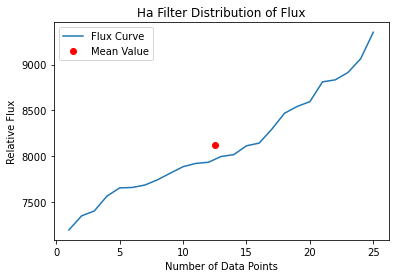

blue Filter, Mean Flux: 11799.97
blue Filter, Mean error: 196.06


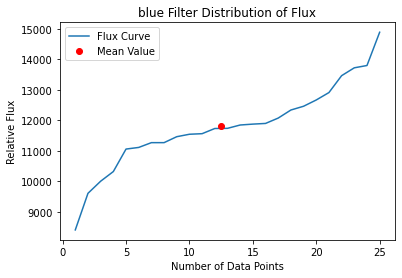

visible Filter, Mean Flux: 36931.75
visible Filter, Mean error: 315.52


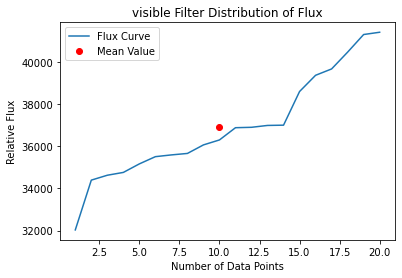

red Filter, Mean Flux: 95711.31
red Filter, Mean error: 361.06


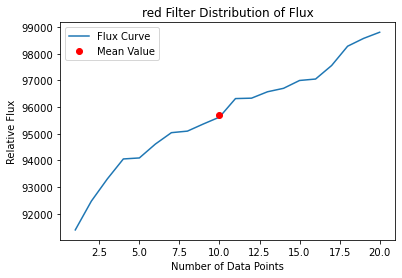

Ir Filter, Mean Flux: 109351.45
Ir Filter, Mean error: 303.26


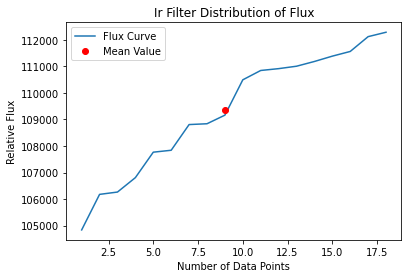

In [15]:
# Get the mean flux for the galaxy in every filter

Ha_mean, Ha_err, Ha_flux_arr = /
mean_flux_extraction(25, 'Ha', ra_low, ra_high, dec_low, dec_high)

blue_mean, blue_err, blue_flux_arr = /
mean_flux_extraction(25, 'blue', ra_low, ra_high, dec_low, dec_high)

visible_mean, visible_err, visible_flux_arr = /
mean_flux_extraction(20, 'visible', ra_low, ra_high, dec_low, dec_high)

red_mean, red_err, red_flux_arr = /
mean_flux_extraction(20, 'red', ra_low, ra_high, dec_low, dec_high)

Ir_mean, Ir_err, Ir_flux_arr = /
mean_flux_extraction(18, 'Ir', ra_low, ra_high, dec_low, dec_high)

In [16]:
# Ref Star Coordinates

ra_low_tyc = 39.6
ra_high_tyc = 39.64
dec_low_tyc = -1.245
dec_high_tyc = -1.26       

Ha Filter, Mean Flux: 22242.40
Ha Filter, Mean error: 124.54


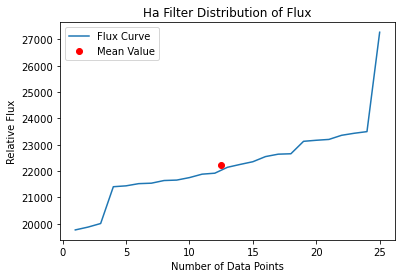

blue Filter, Mean Flux: 74219.48
blue Filter, Mean error: 196.06


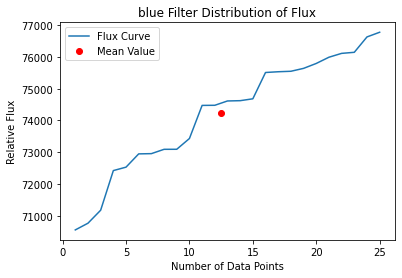

visible Filter, Mean Flux: 161886.07
visible Filter, Mean error: 315.52


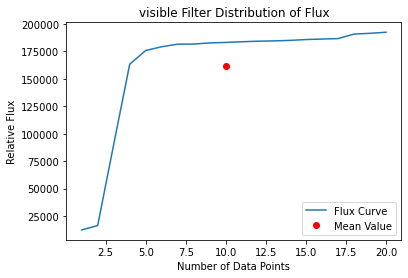

red Filter, Mean Flux: 339924.96
red Filter, Mean error: 361.07


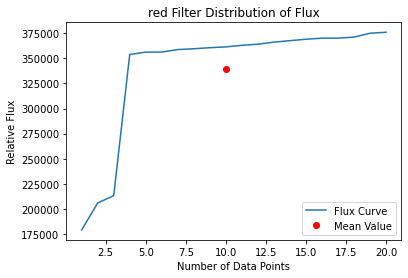

Ir Filter, Mean Flux: 215055.63
Ir Filter, Mean error: 303.26


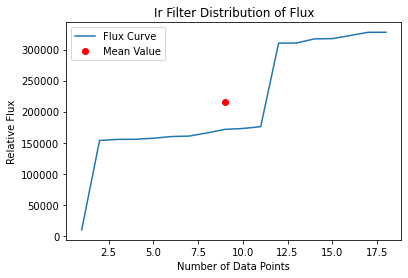

In [17]:
# Get the mean flux for our calibration star TYC

tyc_mean_Ha, tyc_err_Ha, tyc_flux_arr_Ha = /
mean_flux_extraction(25,'Ha', ra_low_tyc, ra_high_tyc, dec_low_tyc, dec_high_tyc)

tyc_mean_blue, tyc_err_blue, tyc_flux_arr_blue = /
mean_flux_extraction(25,'blue', ra_low_tyc, ra_high_tyc, dec_low_tyc, dec_high_tyc)

tyc_mean_visible, tyc_err_visible, tyc_flux_arr_visible = /
mean_flux_extraction(20,'visible', ra_low_tyc, ra_high_tyc, dec_low_tyc, dec_high_tyc)

tyc_mean_red, tyc_err_red, tyc_flux_arr_red = /
mean_flux_extraction(20,'red', ra_low_tyc, ra_high_tyc, dec_low_tyc, dec_high_tyc)

tyc_mean_Ir, tyc_err_Ir, tyc_flux_arr_Ir = /
mean_flux_extraction(18,'Ir', ra_low_tyc, ra_high_tyc, dec_low_tyc, dec_high_tyc)

In [18]:
# Calculate the error of the source flux and reference flux

Ha_errors_actual = background_noise(NGC_Ha_data_reduced, Ha_flux_arr, 508, 528, 540, 560)
blue_errors_actual = background_noise(NGC_blue_data_reduced, blue_flux_arr, 508, 528, 540, 560)
visible_errors_actual = background_noise(NGC_visible_data_reduced, visible_flux_arr, 508, 528, 540, 560)
red_errors_actual = background_noise(NGC_red_data_reduced, red_flux_arr, 508, 528, 540, 560)
Ir_errors_actual = background_noise(NGC_Ir_data_reduced, Ir_flux_arr, 508, 528, 540, 560)

tyc_Ha_errors_actual = background_noise(NGC_Ha_data_reduced, tyc_flux_arr_Ha, 508, 528, 540, 560)
tyc_blue_errors_actual = background_noise(NGC_blue_data_reduced, tyc_flux_arr_blue, 508, 528, 540, 560)
tyc_visible_errors_actual = background_noise(NGC_visible_data_reduced, tyc_flux_arr_visible, 508, 528, 540, 560)
tyc_red_errors_actual = background_noise(NGC_red_data_reduced, tyc_flux_arr_red, 508, 528, 540, 560)
tyc_Ir_errors_actual = background_noise(NGC_Ir_data_reduced, tyc_flux_arr_Ir, 508, 528, 540, 560)

In [19]:
Relative_Flux_galaxy = [Ha_mean, blue_mean, visible_mean, red_mean, Ir_mean]
Relative_Flux_Error_galaxy = [Ha_errors_actual, blue_errors_actual, visible_errors_actual, /
                              red_errors_actual, Ir_errors_actual]

Relative_Flux_tyc = [tyc_mean_Ha, tyc_mean_blue, tyc_mean_visible, tyc_mean_red, tyc_mean_Ir]
Relative_Flux_Error_tyc = [tyc_Ha_errors_actual, tyc_blue_errors_actual, tyc_visible_errors_actual, /
                           tyc_red_errors_actual, tyc_Ir_errors_actual]

In [20]:
Relative_Flux_galaxy

[8120.53456, 11799.97196, 36931.74800000001, 95711.311, 109351.45000000001]

In [21]:
Relative_Flux_Error_galaxy

[176.44252861690708,
 359.44695412362483,
 592.7076555378362,
 723.4022507833679,
 579.4855702922118]

In [22]:
Relative_Flux_tyc

[22242.403999999995, 74219.4764, 161886.0725, 339924.96, 215055.62666666668]

In [23]:
Relative_Flux_Error_tyc

[211.4921416625296,
 438.08809401081714,
 701.316726391901,
 889.0548468341958,
 659.4951469821308]

In [24]:
blue_mag_tyc = 11.579
blue_mAB_conv = -0.09

visible_mag_tyc = 10.925
visible_mAB_conv = 0.02
 
red_mag_AB = 10.722
red_mag_tyc = 10.722 + 0.16
red_mAB_conv = 0.21

In [25]:
### Calculates the calibrated flux of the target source
### in microjanskys

def mag_to_mujansky(m_star, f_galaxy, f_star, mag_AB):
    
    m_galaxy = m_star - 2.5*np.log10(f_galaxy/f_star)
    #m_galaxy = - (2.5*np.log10(f_galaxy/f_star))/0.03
    #print(f'Mag of galaxy: {m_galaxy}')
    AB = m_galaxy - mag_AB
    
    mu_jansky = 10 ** ((23.9 - AB) / 2.5)
    
    print(f'Flux in MicroJanskys: {mu_jansky:.2f}')
    return mu_jansky


In [26]:
blue_load = mag_to_mujansky(blue_mag_tyc, blue_mean, tyc_mean_blue, blue_mAB_conv)
visible_load = mag_to_mujansky(visible_mag_tyc, visible_mean, tyc_mean_visible, visible_mAB_conv)
red_load = mag_to_mujansky(red_mag_tyc, red_mean, tyc_mean_red, red_mAB_conv)

Flux in MicroJanskys: 12409.75
Flux in MicroJanskys: 35990.71
Flux in MicroJanskys: 55052.90


In [27]:
blue_load

12409.751617051665

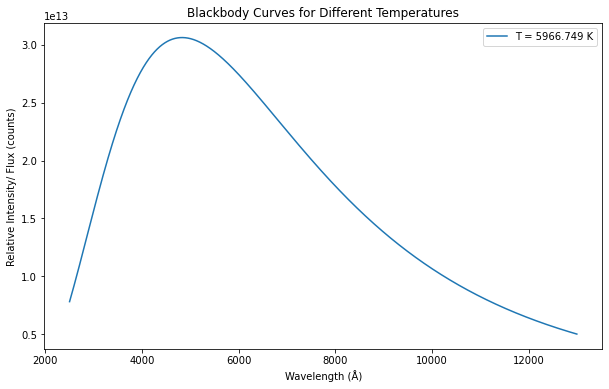

In [28]:
# The calibration star did not have known magnitudes 
# in Ha and Ir filter bands so we need to use integration
# methods of the star's bb spectrum to obtain the true 
# calibrated flux in microjanskys to apply to our 
# measured mean flux of Ha and Ir

from scipy.integrate import simps

# Create a black body curve for a typical 5000K
# star, which is the temp of our TYC-626 ref star

# Constants
h = 6.626e-34  # Planck’s constant (Joule second)
c = 3.0e+8    # Speed of light (m/s)
k = 1.38e-23  # Boltzmann constant (Joule per Kelvin)
# Planck’s Radiation Law (Blackbody Curve) with correct units
def blackbody_lambda(wavelength, T):
    a = (2.0 * h * c**2) / wavelength**5
    b = (h * c) / (wavelength * k * T)
    intensity = a / (np.exp(b))
    return intensity
# Wavelength in Angstroms
x_wavelength = 3900 + np.arange(765)
new_xx = np.arange(2500, 13000)
x_wavelength_meters = new_xx * 1e-10  # Convert Angstroms to meters
xwm = 1 / ((x_wavelength_meters)** 5)
# Calculate and plot blackbody spectra for a range of temperatures
plt.figure(figsize=(10, 6))
for T in [5966.749]:  # CHANGED FROM 4996.993
    bb_spectrum = blackbody_lambda(x_wavelength_meters, T)
    plt.plot(new_xx, bb_spectrum, label=f'T = {T} K')  
plt.title('Blackbody Curves for Different Temperatures')  
plt.xlabel('Wavelength (Å)') 
plt.ylabel('Relative Intensity/ Flux (counts)')  
plt.legend()
plt.show()


In [29]:
AB_blue = 11.579 - (-0.09)
    
mu_jansky_b_filter = 10 ** ((23.9 - AB_blue) / 2.5)
print(f'Expected flux of reference star in blue filter: {mu_jansky_b_filter:.2f} \u03bcJy/electron')

Expected flux of reference star in blue filter: 78054.87 μJy/electron


In [30]:
# Load filter curve data to get transmission percetages at designated
# wavelengths. These ranges will be integrated over using Simpsons rule 
ha_filter_curve = r'/Users/adamfletcher/Desktop/NGC1015_Data/Lab3/Ha_curve.dat'
Ir_filter_curve = r'/Users/adamfletcher/Desktop/NGC1015_Data/Lab3/Ir_curve.dat'
blue_filter_curve = r'/Users/adamfletcher/Desktop/NGC1015_Data/Lab3/Blue_curve.dat'
wave_blue, transmission_blue = np.loadtxt(blue_filter_curve, unpack = True, usecols = [0,1])
wave_ha, transmission_ha = np.loadtxt(ha_filter_curve, unpack = True, usecols = [0,1])
wave_Ir, transmission_Ir = np.loadtxt(Ir_filter_curve, unpack = True, usecols = [0,1])

In [31]:
### Ir Filter First ###
# Find the array range that coincides with the black body values
# at the given wavelengths
Ir_run = new_xx[::100]
Ir_run = Ir_run[45:68]

# Slice new bb range of values
Ir_range = bb_spectrum[::100]
Ir_range = Ir_range[45:68]

# Multiply the transmission percent to the bb values
# to find a value that represents the true amount of photons
# let through the filter
Ir_range = transmission_Ir * Ir_range
Ir_range

array([0.00000000e+00, 5.29394072e+11, 5.00258303e+12, 1.16948543e+13,
       1.61597785e+13, 1.82957444e+13, 1.89438348e+13, 1.88758682e+13,
       1.85158186e+13, 1.81586196e+13, 1.78046885e+13, 1.73675566e+13,
       1.67692882e+13, 1.61878373e+13, 1.53009410e+13, 1.42896518e+13,
       1.31650802e+13, 1.11916735e+13, 8.14514740e+12, 4.67815601e+12,
       2.07242366e+12, 4.03938721e+11, 0.00000000e+00])

In [32]:
# Normalize the Ha.dat file to be in terms of transmission
# Literature states that the Ha filter allows btw 60-80%
# transmission so we will multiply the normalized values by
# 0.8, then multiply the bb values by the transmission as 
# done above.
max_ha = max(transmission_ha)
transmission_ha = (transmission_ha / max_ha)*0.8

ha_y_range = bb_spectrum[4000:4125]

new_ha_spectrum = ha_y_range * transmission_ha

In [33]:
# Multiply by bb values by transmission values as above
blue_y_range = bb_spectrum[::100]
blue_y_range = blue_y_range[11:32]
blue_y_range

new_bb_spectrum = blue_y_range * transmission_blue

In [34]:
# Reference our measured mean flux values for the 
# reference star
ref_star_mean_Ha = 22242.40
ref_star_mean_Ir = 215055.63

# Integrate over the area of the bb that contains 
# the spread of the filter ranges
flux_blue_integral = simps(new_bb_spectrum, wave_blue)
flux_Ir_integral = simps(Ir_range, wave_Ir)
flux_ha_integral = simps(new_ha_spectrum, wave_ha)

# Solve for the scaling factor for the blue filter to get 
# a baseline value to equate to the integrals of the unknown 
# true flux in microJanskys of the Ha and Ir filters
amplitude = mu_jansky_b_filter / flux_blue_integral

# Find the true value of flux for each filter
ref_star_Ha_flux_mu_jansky = amplitude * flux_ha_integral
ref_star_Ir_flux_mu_jansky = amplitude * flux_Ir_integral

# Calibrated ratio of the true flux to the electron count 
# measured by the ccd. Apply this conversion to the mean
# flux of the galaxy to get the true galaxy flux in microJanskys
calibrated_ratio_Ha = ref_star_Ha_flux_mu_jansky / ref_star_mean_Ha
print(f'Calibrated Ha Ratio: {calibrated_ratio_Ha:.3f} \u03BCJy/electron') 
## Units of Microjanskys / electron count

calibrated_ratio_Ir = ref_star_Ir_flux_mu_jansky / ref_star_mean_Ir
print(f'Calibrated Ir Ratio: {calibrated_ratio_Ir:.3f} \u03BCJy/electron') 
## Microjanskys / electron count

Calibrated Ha Ratio: 0.080 μJy/electron
Calibrated Ir Ratio: 0.338 μJy/electron


In [35]:
Ha_mean

8120.53456

In [36]:
calibrated_ratio_Ha

0.08017805853235226

In [37]:
Ha_load = calibrated_ratio_Ha * Ha_mean
Ir_load = calibrated_ratio_Ir * Ir_mean

In [38]:
Flux_Loads = [Ha_load, blue_load, visible_load, red_load, Ir_load]
print(f'Flux Ha: {Flux_Loads[0]:.2f} \u03BCJy')
print(f'Flux Blue: {Flux_Loads[1]:.2f} \u03BCJy')
print(f'Flux Visible: {Flux_Loads[2]:.2f} \u03BCJy')
print(f'Flux Red: {Flux_Loads[3]:.2f} \u03BCJy')
print(f'Flux Ir: {Flux_Loads[4]:.2f} \u03BCJy')

Flux Ha: 651.09 μJy
Flux Blue: 12409.75 μJy
Flux Visible: 35990.71 μJy
Flux Red: 55052.90 μJy
Flux Ir: 36989.66 μJy


In [39]:
blue_load_err = np.abs(blue_load - mag_to_mujansky(blue_mag_tyc, blue_mean+1, tyc_mean_blue, blue_mAB_conv))
visible_load_err = np.abs(visible_load - mag_to_mujansky(visible_mag_tyc, visible_mean+1, tyc_mean_visible,/
                                                         visible_mAB_conv))
red_load_err = np.abs(red_load - mag_to_mujansky(red_mag_tyc, red_mean+1, tyc_mean_red, red_mAB_conv))
Ha_load_err = np.abs(Ha_load - (calibrated_ratio_Ha * (Ha_mean+1)))
Ir_load_err = np.abs(Ir_load - (calibrated_ratio_Ir * (Ir_mean+1)))
Flux_Loads_Err = [Ha_load_err, blue_load_err, visible_load_err, red_load_err, Ir_load_err]
print(f'Flux error Ha: {Flux_Loads_Err[0]:.2f} \u03BCJy')
print(f'Flux error Blue: {Flux_Loads_Err[1]:.2f} \u03BCJy')
print(f'Flux error Visible: {Flux_Loads_Err[2]:.2f} \u03BCJy')
print(f'Flux error Red: {Flux_Loads_Err[3]:.2f} \u03BCJy')
print(f'Flux error Ir: {Flux_Loads_Err[4]:.2f} \u03BCJy')

Flux in MicroJanskys: 12410.80
Flux in MicroJanskys: 35991.68
Flux in MicroJanskys: 55053.48
Flux error Ha: 0.08 μJy
Flux error Blue: 1.05 μJy
Flux error Visible: 0.97 μJy
Flux error Red: 0.58 μJy
Flux error Ir: 0.34 μJy


In [40]:
LOAD = np.vstack((Flux_Loads, Flux_Loads_Err)).T
print(LOAD)

[[6.51088695e+02 8.01780585e-02]
 [1.24097516e+04 1.05167636e+00]
 [3.59907069e+04 9.74519454e-01]
 [5.50529011e+04 5.75197441e-01]
 [3.69896586e+04 3.38263997e-01]]


In [41]:
Ha_curve = "r'/Users/adamfletcher/Desktop/NGC1015_data/Lab3/Ha_curve.dat"

In [42]:
import numpy as np 
import bagpipes as pipes

from astropy.io import fits

exp = {}                          # Tau model star formation history component
exp["age"] = 3.                   # Gyr
exp["tau"] = 0.75                 # Gyr
exp["massformed"] = 9.            # log_10(M*/M_solar)
exp["metallicity"] = 0.5          # Z/Z_oldsolar

dust = {}                         # Dust component
dust["type"] = "Calzetti"         # Define the shape of the attenuation curve
dust["Av"] = 0.2                  # magnitudes

model_components = {}                   # The model components dictionary
model_components["redshift"] = 1.0      # Observed redshift  
model_components["exponential"] = exp   
model_components["dust"] = dust


generic_filt_list = [#r"/Users/adamfletcher/Desktop/NGC1015_Data/Lab3/Ha_curve.dat",
                    r"/Users/adamfletcher/Desktop/NGC1015_Data/Lab3/Blue_curve.dat",
                    r"/Users/adamfletcher/Desktop/NGC1015_Data/Lab3/Visible_curve.dat",
                    r"/Users/adamfletcher/Desktop/NGC1015_Data/Lab3/Red_curve.dat"]#,
                    #r"/Users/adamfletcher/Desktop/NGC1015_Data/Lab3/Ir_curve.dat"]




Bagpipes: Latex distribution not found, plots may look strange.


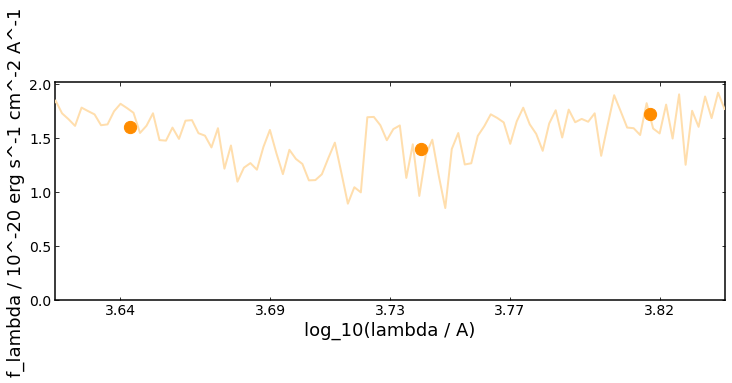

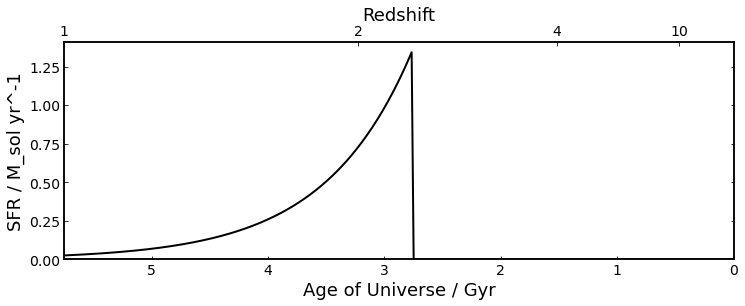

In [43]:
model = pipes.model_galaxy(model_components, filt_list= generic_filt_list)

fig = model.plot()
fig = model.sfh.plot()

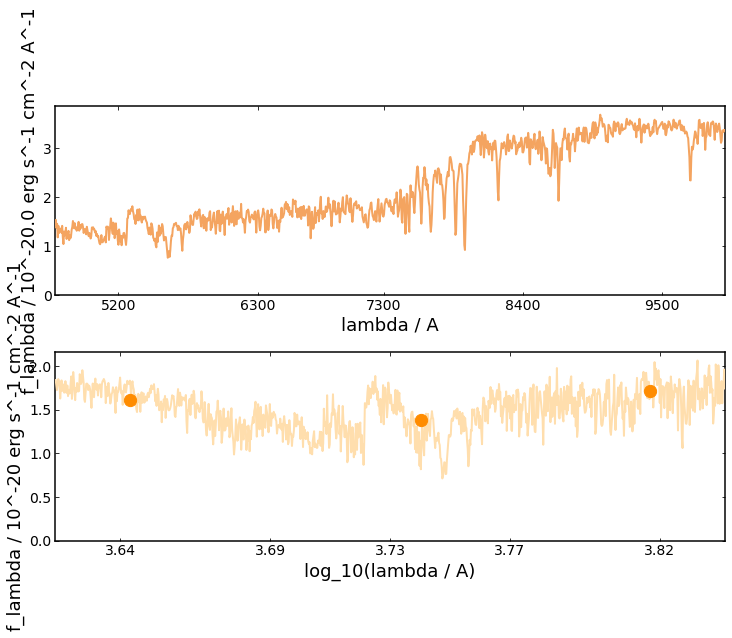

In [44]:
model = pipes.model_galaxy(model_components, filt_list=generic_filt_list, spec_wavs=np.arange(4700., 10000., 5.))

fig = model.plot()

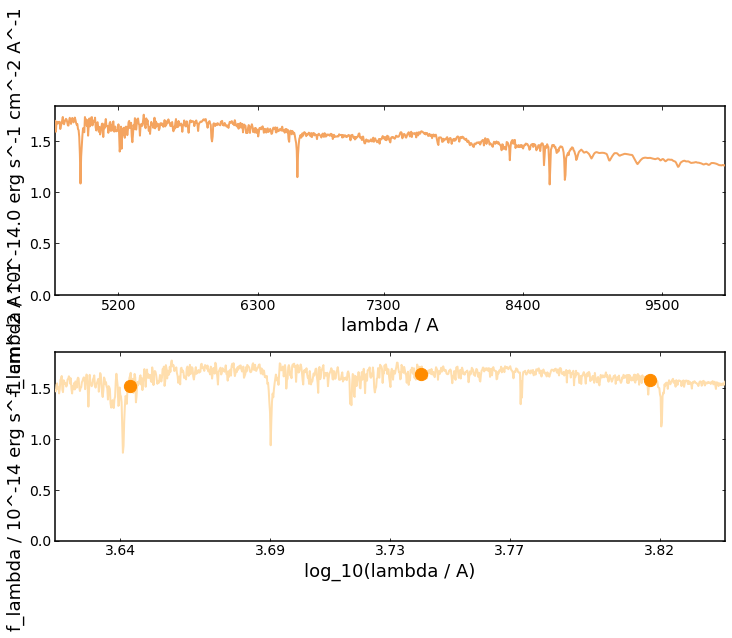

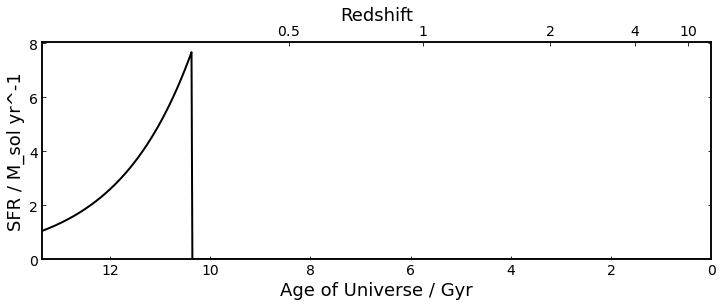

In [45]:
exp["massformed"] = 10.           
exp["tau"] = 1.5
dust["Av"] = 1.0
model_components["redshift"] = 0.008

model.update(model_components)
fig = model.plot()
fig = model.sfh.plot()

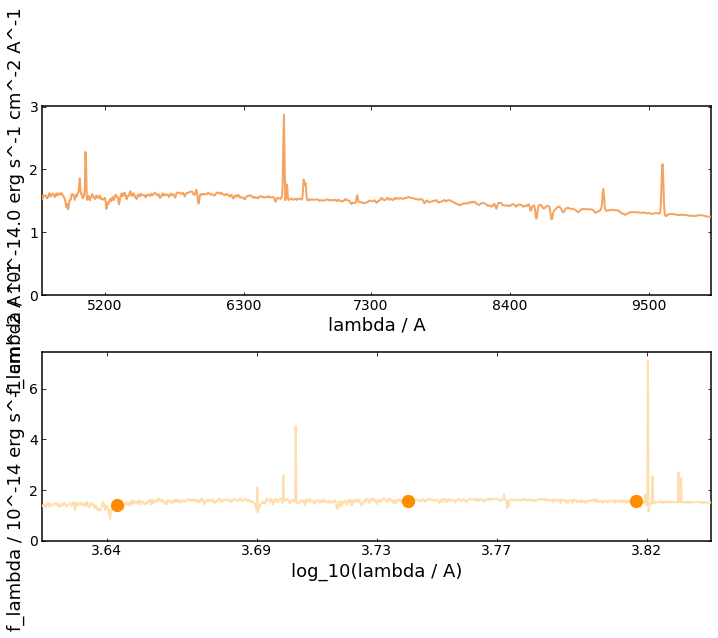

In [46]:
nebular = {}                      # Nebular emission component
nebular["logU"] = -3.             # log_10(ionization parameter)

dust["eta"] = 3.                  # Extra dust for young stars: multiplies Av

model_components["t_bc"] = 0.01         # Lifetime of birth clouds (Gyr)
model_components["veldisp"] = 200.      # km/s
model_components["nebular"] = nebular

model = pipes.model_galaxy(model_components, filt_list=generic_filt_list, spec_wavs=np.arange(4700., 10000., 5.))

fig = model.plot()

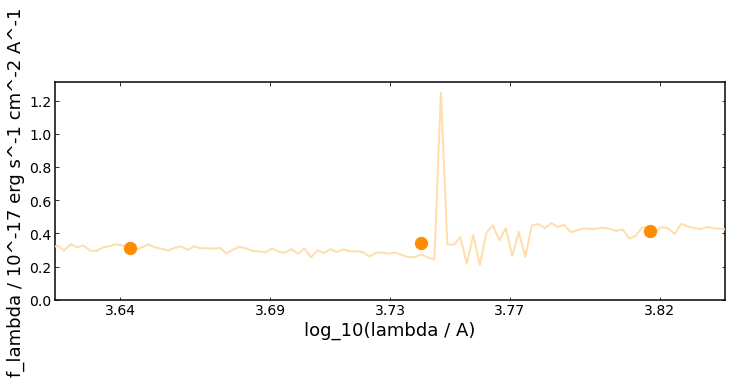

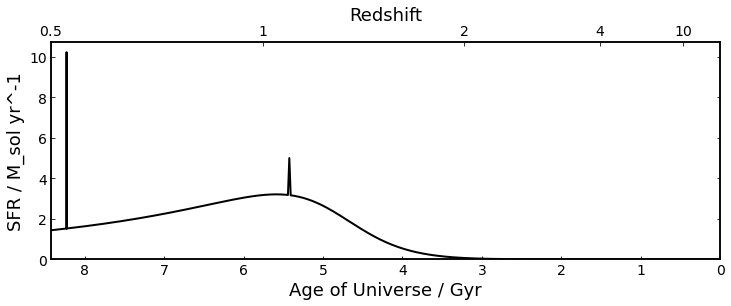

In [47]:
dust = {}                         
dust["type"] = "Calzetti"         
dust["Av"] = 0.2                  
dust["eta"] = 3.                  

nebular = {}                      
nebular["logU"] = -3.             

dblplaw = {}
dblplaw["tau"] = 5.
dblplaw["alpha"] = 2.5
dblplaw["beta"] = 10.
dblplaw["massformed"] = 10.
dblplaw["metallicity"] = 0.5

burst1 = {}
burst1["age"] = 0.2
burst1["massformed"] = 7.
burst1["metallicity"] = 1.

burst2 = {}
burst2["age"] = 3.
burst2["massformed"] = 7.5
burst2["metallicity"] = 0.2

model_components = {}                   
model_components["redshift"] = 0.5
model_components["t_bc"] = 0.01         
model_components["veldisp"] = 200. 
model_components["burst1"] = burst1
model_components["burst2"] = burst2
model_components["dblplaw"] = dblplaw
model_components["dust"] = dust
model_components["nebular"] = nebular

model = pipes.model_galaxy(model_components, filt_list=generic_filt_list)

fig = model.plot()
sfh = model.sfh.plot()

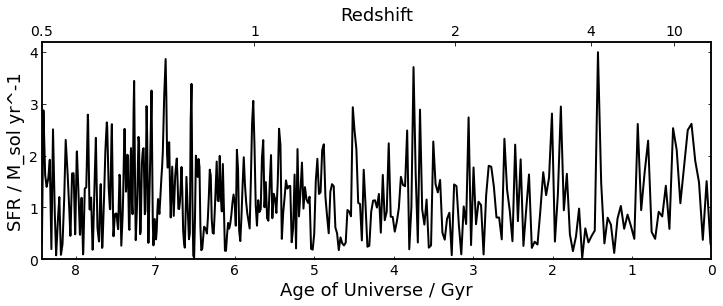

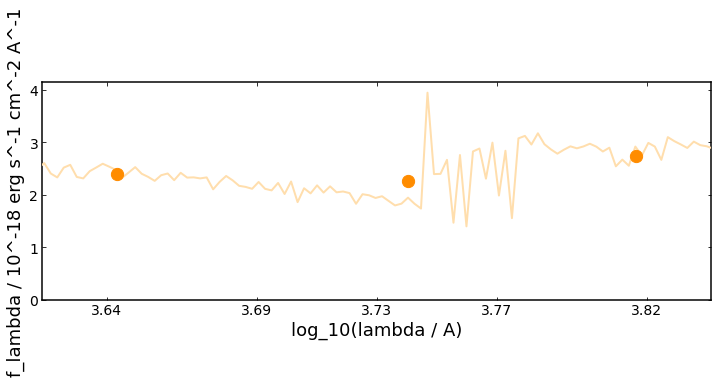

In [48]:
dust = {}                         
dust["type"] = "Calzetti"         
dust["Av"] = 0.2                  
dust["eta"] = 3.                  

nebular = {}                      
nebular["logU"] = -3.             

sfh = np.zeros((500, 2))
sfh[:, 0] = np.arange(0., 10., 0.02)*10**9
sfh[:, 1] = np.abs(np.random.randn(500))

custom = {}
custom["history"] = sfh
custom["massformed"] = 10.
custom["metallicity"] = 1.

model_components = {}                   
model_components["redshift"] = 0.5
model_components["t_bc"] = 0.01         
model_components["veldisp"] = 200. 
model_components["custom"] = custom
model_components["dust"] = dust
model_components["nebular"] = nebular

model = pipes.model_galaxy(model_components, filt_list=generic_filt_list)

sfh = model.sfh.plot()
fig = model.plot()

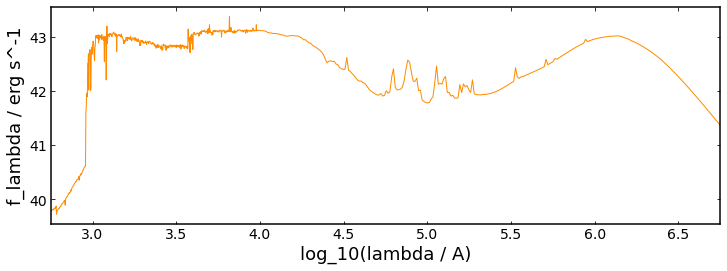

In [49]:
model.plot_full_spectrum()

[[12409.7516     620.48758 ]
 [35990.7069    1799.535345]
 [55052.9011    2752.645055]]


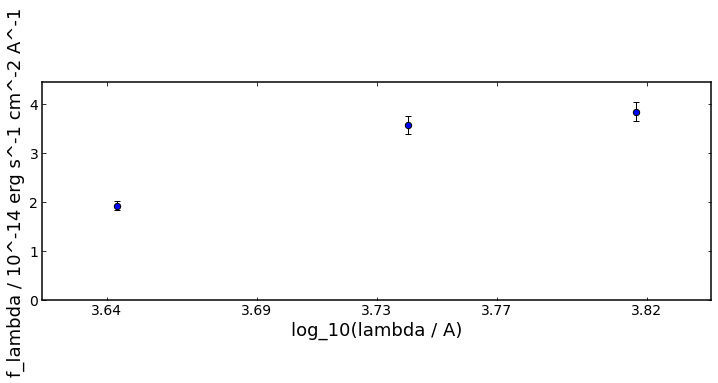

In [50]:
import numpy as np 
import bagpipes as pipes

from astropy.io import fits

import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

#'1015' = LOAD

def load_goodss(ID):
    """ Load UltraVISTA photometry from catalogue. """

    # load up the relevant columns from the catalogue.
    cat = np.loadtxt(f"/Users/adamfletcher/Desktop/NGC1015_Data/Lab3/{ID}")#,
                     #usecols=(0, 1))
    
    # Find the correct row for the object we want.
    #row = int(ID) - 1

    # Extract the object we want from the catalogue.
    fluxes = cat[:,0]
    fluxerrs = cat[:,1]
    #print(fluxes)
    #print(fluxerrs)

    # Turn these into a 2D array.
    photometry = np.c_[fluxes, fluxerrs]
    #print(photometry)

    # blow up the errors associated with any missing fluxes.
    for i in range(len(photometry)):
        if (photometry[i, 0] == 0.) or (photometry[i, 1] <= 0):
            photometry[i,:] = [0., 9.9*10**99.]
    #print(photometry)       
    # Enforce a maximum SNR of 20, or 10 in the IRAC channels.
    for i in range(len(photometry)):
        if i < 10:
            max_snr = 20.
            
        else:
            max_snr = 10.
        
        if photometry[i, 0]/photometry[i, 1] > max_snr:
            photometry[i, 1] = photometry[i, 0]/max_snr
    print(photometry)
    return photometry


# set file paths to curve fit files for each wavelength filter used in data collection
# with the wavelength in angstroms in the left column
# and the transmittance percentage in the right column

generic_filt_list = [#r"/Users/adamfletcher/Desktop/NGC1015_Data/Lab3/Ha_curve.dat",
                    r"/Users/adamfletcher/Desktop/NGC1015_Data/Lab3/Blue_curve.dat",
                    r"/Users/adamfletcher/Desktop/NGC1015_Data/Lab3/Visible_curve.dat",
                    r"/Users/adamfletcher/Desktop/NGC1015_Data/Lab3/Red_curve.dat"]#,
                    #r"/Users/adamfletcher/Desktop/NGC1015_Data/Lab3/Ir_curve.dat"]

galaxy = pipes.galaxy("flux.dat", load_goodss, spectrum_exists=False, filt_list=generic_filt_list)

fig = galaxy.plot()

In [51]:
exp = {}                                  # Tau-model star-formation history component
exp["age"] = (0.1, 15.)                   # Vary age between 100 Myr and 15 Gyr. In practice 
                                          # the code automatically limits this to the age of
                                          # the Universe at the observed redshift.

exp["tau"] = (0.3, 10.)                   # Vary tau between 300 Myr and 10 Gyr
exp["massformed"] = (1., 15.)             # vary log_10(M*/M_solar) between 1 and 15
exp["metallicity"] = (0., 2.5)            # vary Z between 0 and 2.5 Z_oldsolar

dust = {}                                 # Dust component
dust["type"] = "Calzetti"                 # Define the shape of the attenuation curve
dust["Av"] = (0., 2.)                     # Vary Av between 0 and 2 magnitudes

fit_instructions = {}                     # The fit instructions dictionary
fit_instructions["redshift"] = (0., .009)  # Vary observed redshift from 0 to 10
fit_instructions["exponential"] = exp   
fit_instructions["dust"] = dust

In [52]:
fit = pipes.fit(galaxy, fit_instructions)

fit.fit(verbose=False)


Bagpipes: fitting object flux.dat


Completed in 44.0 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
dust:Av                        0.673      1.027      1.543
exponential:age                7.381     10.430     12.491
exponential:massformed        10.485     10.898     11.170
exponential:metallicity        0.858      1.568      2.186
exponential:tau                0.611      1.258      2.362
redshift                       0.004      0.006      0.008




In [53]:
list(fit.posterior.samples)

['dust:Av',
 'exponential:age',
 'exponential:massformed',
 'exponential:metallicity',
 'exponential:tau',
 'redshift',
 'stellar_mass',
 'formed_mass',
 'sfr',
 'ssfr',
 'nsfr',
 'mass_weighted_age',
 'tform',
 'tquench',
 'mass_weighted_zmet',
 'sfh']

In [54]:
print(np.median(fit.posterior.samples["formed_mass"]))

10.917461738760338


In [55]:
print(np.median(fit.posterior.samples["sfr"]))

0.024932882106623474


In [56]:
print(np.median(np.log10(fit.posterior.samples["sfr"]) - fit.posterior.samples["stellar_mass"]))

-12.037052425141415


In [57]:
print(np.percentile(fit.posterior.samples["mass_weighted_age"], (16, 84)))

[ 6.20466293 10.76049966]


In [58]:
fit.posterior.get_advanced_quantities()
list(fit.posterior.samples)

['dust:Av',
 'exponential:age',
 'exponential:massformed',
 'exponential:metallicity',
 'exponential:tau',
 'redshift',
 'stellar_mass',
 'formed_mass',
 'sfr',
 'ssfr',
 'nsfr',
 'mass_weighted_age',
 'tform',
 'tquench',
 'mass_weighted_zmet',
 'sfh',
 'photometry',
 'spectrum_full',
 'uvj',
 'chisq_phot',
 'dust_curve']

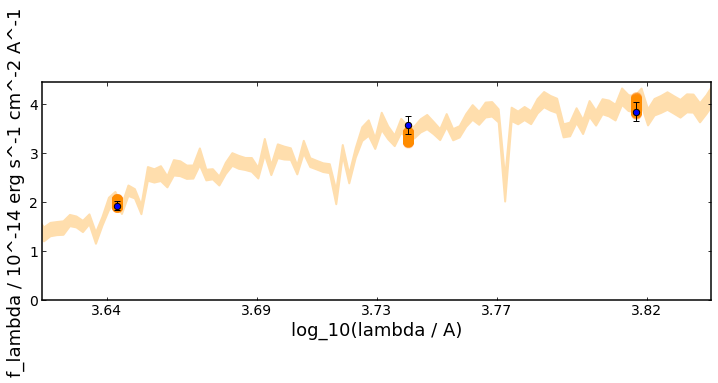

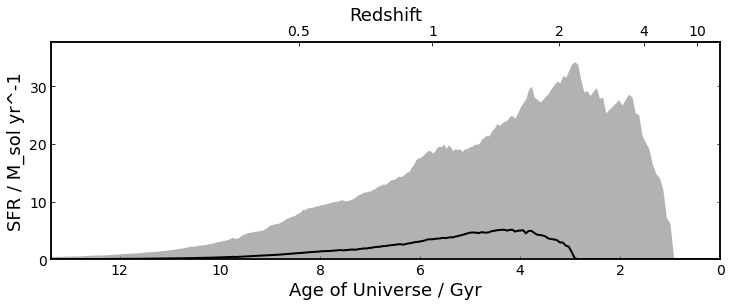

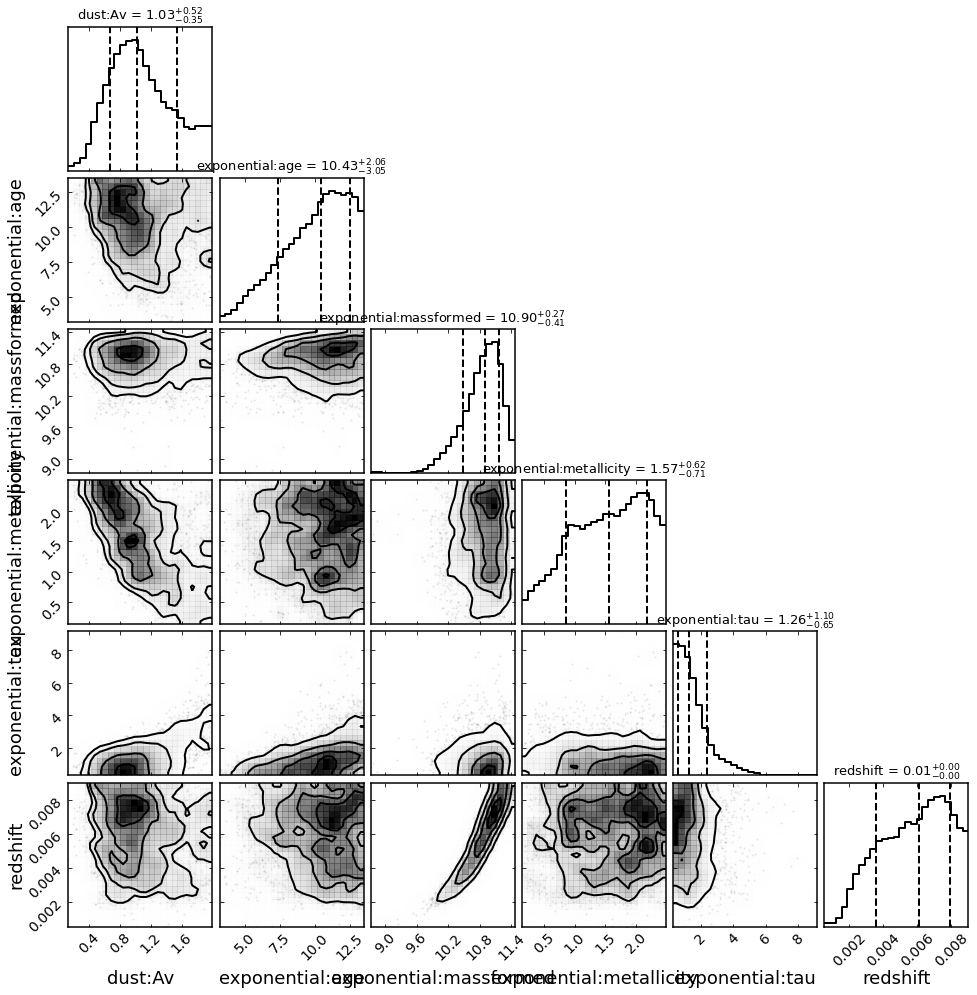

In [59]:
fig = fit.plot_spectrum_posterior(save=False, show=True)
fig = fit.plot_sfh_posterior(save=False, show=True)
fig = fit.plot_corner(save=False, show=True)

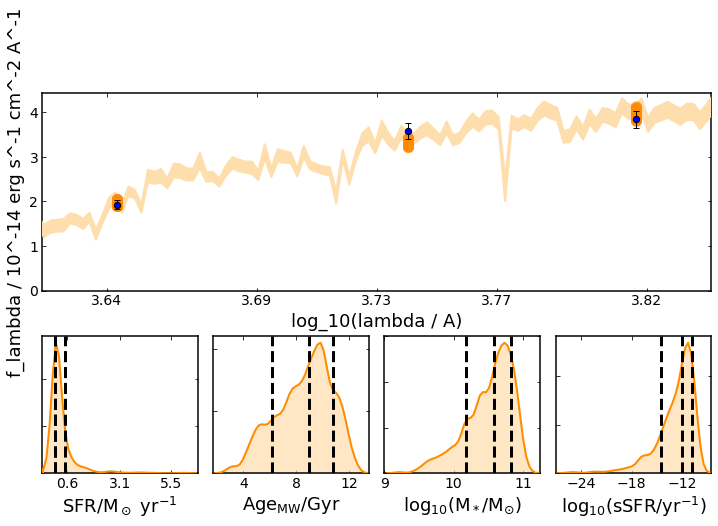

In [60]:
plt.close()

fig = plt.figure(figsize=(12, 7))
gs = mpl.gridspec.GridSpec(7, 4, hspace=3., wspace=0.1)

ax1 = plt.subplot(gs[:4, :])

pipes.plotting.add_observed_photometry(fit.galaxy, ax1, zorder=10)
pipes.plotting.add_photometry_posterior(fit, ax1)

labels = ["sfr", "mass_weighted_age", "stellar_mass", "ssfr"]

post_quantities = dict(zip(labels, [fit.posterior.samples[l] for l in labels]))

axes = []
for i in range(4):
    axes.append(plt.subplot(gs[4:, i]))
    pipes.plotting.hist1d(post_quantities[labels[i]], axes[-1], smooth=True, label=labels[i])

plt.show()